# AIM
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [499]:
# importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [500]:
# reading the data to dataframes
loan_df = pd.read_csv('loan.csv')
loan_df.info()

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\448760152.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [501]:
#checking if id is unique
loan_df.id.unique().shape

(39717,)

In [502]:
#check if memberid is unique
loan_df.member_id.unique().shape
# Either id or member_id can be used to identify each row individually

(39717,)

In [503]:
loan_df.set_index('id')

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Removing unnecessary columns

In [504]:
loan_df.notnull().sum()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [505]:
# removing all the columns which have no values
# loan_df = loan_df.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis=1)
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [506]:
# emp-title doesnt have a uniform set of values and its random which will not be helpful for analysis
# 'issue_d': issue date may not effect the defaulters(guess)
# 'pymnt_plan' has a unique value for all the rows, so it will not be useful for analysis
#  hence removing it from dataframe
loan_df = loan_df.drop(['member_id', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 
                        'desc', 'title', 'zip_code', 'earliest_cr_line', 'mths_since_last_delinq',
                          'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med','inq_last_6mths', 'policy_code', 
       'application_type', 'acc_now_delinq'], axis=1)

In [507]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [508]:
#check if there are any nulls in loan_status
loan_df.loan_status.notnull().sum()
# There are no nulls.

np.int64(39717)

In [509]:
#fetch all the defaulted customers account details in to chargedOffLoan_df
defaultedLoan_df = loan_df[loan_df.loan_status == 'Charged Off']
#fetch all the Fully paid customers account details in to fullyPaidLoan_df
fullyPaidLoan_df = loan_df[loan_df.loan_status == 'Fully Paid']

In [510]:
defaultedLoan_df.shape

(5627, 28)

In [511]:
fullyPaidLoan_df.shape

(32950, 28)

In [512]:
# get the over all picture of how many defaulters are available in the complete data
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

**Approach for uniVariate Analysis**
- Evaluate individual column for univariate analysis
- Clean the data of that column
- Check for missing values
- Fill the missing values if fillable(if doesnt effect analysis)
- Handle outliers
- visualize the relation between the column and the loan_status

**term analysis**

In [513]:
# term analysis
print(loan_df.term.notnull().sum())
# there are no nulls in term field
loan_df.term.value_counts()

39717


term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [514]:
loan_df.pivot_table(index=['term'], columns='loan_status',  values=['id'], aggfunc='count')

id                   
loan_status Charged Off Current Fully Paid
term                                      
36 months        3227.0     NaN    25869.0
60 months        2400.0  1140.0     7081.0

- many customers have defaulted from 36 months term loans
- It could be possible that, there could be more installment amount to be paid in 36 months term loans when compared to 60 months loans.
- This high installment amount could be the reason for default. Lets analyse later comparing both term, income earned by customer and installments already paying and find out what is the relation between them? -- TODO

In [515]:
# checking if installment has been a burden when its compared to the annual income earned
#annual income vs installment
loan_df.annual_inc.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: annual_inc
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


In [516]:
defaultedLoan_df.annual_inc.describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

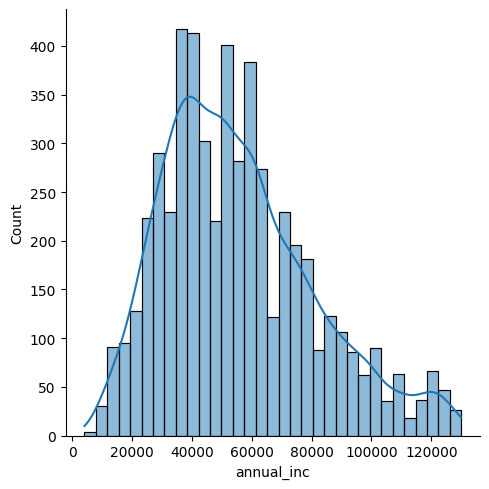

In [517]:
sns.displot(x='annual_inc', data=defaultedLoan_df[defaultedLoan_df.annual_inc <= 130000], kde=True)

<Axes: >

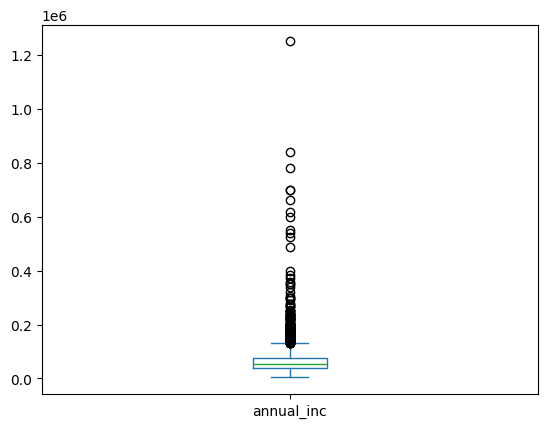

In [518]:
defaultedLoan_df.annual_inc.plot.box()

In [519]:
# lets calculate the percentage of annual income paid as installment
loan_df.installment.info()
loan_df['installmentPercent'] = loan_df.apply(lambda x: 100 * 12 * x.installment/x.annual_inc, axis=1)
loan_df.installmentPercent.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: installment
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


count    39717.000000
mean         6.580104
std          3.998421
min          0.028895
25%          3.524810
50%          5.800500
75%          8.840533
max         32.026200
Name: installmentPercent, dtype: float64

In [520]:
default_fullyPaid_df = loan_df[(loan_df.loan_status == 'Charged Off') | (loan_df.loan_status == 'Fully Paid')]

<Axes: xlabel='installment', ylabel='annual_inc'>

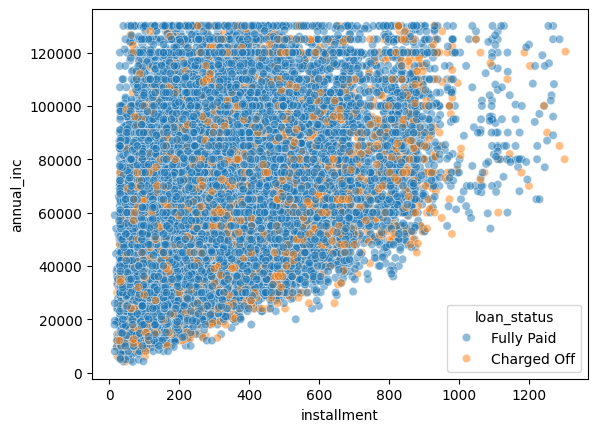

In [521]:
#removing outliers from annual_inc and scattering the plot accross installment and annual_inc
def_full_above1_3Linc_df = default_fullyPaid_df[default_fullyPaid_df.annual_inc <= 130000]
sns.scatterplot(x=def_full_above1_3Linc_df.installment, y=def_full_above1_3Linc_df.annual_inc, hue=def_full_above1_3Linc_df.loan_status, alpha=0.5 )

<Axes: xlabel='installmentPercent', ylabel='annual_inc'>

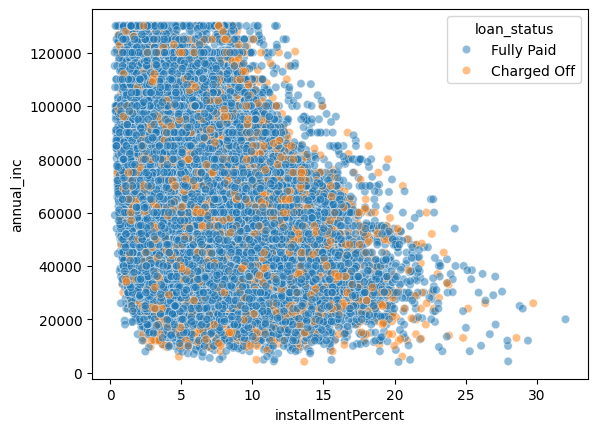

In [522]:
sns.scatterplot(x=def_full_above1_3Linc_df.installmentPercent, y=def_full_above1_3Linc_df.annual_inc, hue=def_full_above1_3Linc_df.loan_status, alpha=0.5 )

<Axes: xlabel='installmentPercent', ylabel='annual_inc'>

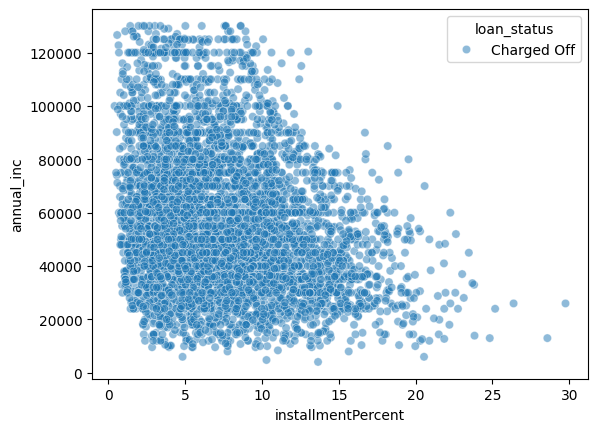

In [523]:
def_below1_3Linc_df = loan_df[(loan_df.annual_inc <= 130000) & (loan_df.loan_status == 'Charged Off')]
sns.scatterplot(x=def_below1_3Linc_df.installmentPercent, y=def_below1_3Linc_df.annual_inc, hue=def_below1_3Linc_df.loan_status, alpha=0.5 )

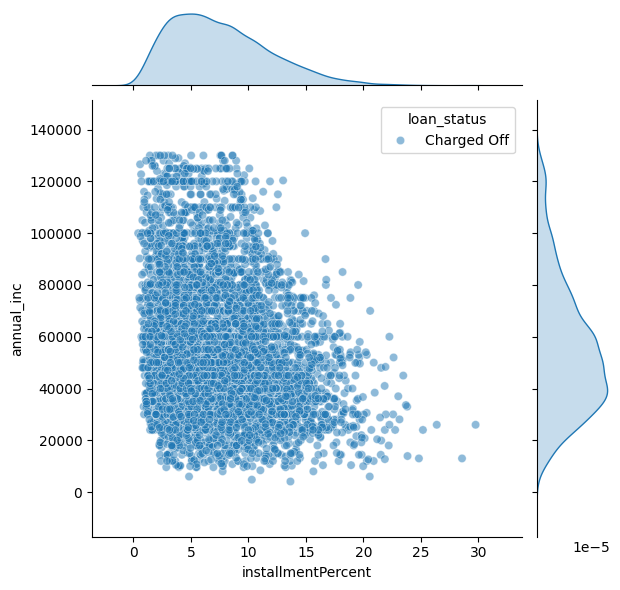

In [524]:
sns.jointplot(x=def_below1_3Linc_df.installmentPercent, y=def_below1_3Linc_df.annual_inc, hue=def_below1_3Linc_df.loan_status, alpha=0.5 )

<Axes: xlabel='loan_status', ylabel='annual_inc'>

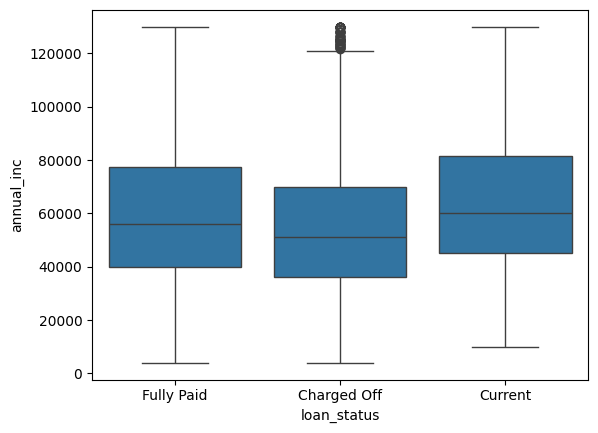

In [525]:
loan_df_below_1_3Linc = loan_df[(loan_df.annual_inc <= 130000)]
sns.boxplot(data=loan_df_below_1_3Linc, x='loan_status', y='annual_inc')

**Observation**
- q1 to q2 is slightly thinner than q2 to q3 which says people with lower annual income has a little tendency to be defaulters
- median and Q3 are also lower for defaulter when compared to fully paid
- seems like customers with less annual income have been more defaulters

# emp_length analysis

In [526]:
defaultedLoan_df.emp_length.isnull().sum()
# fill null values with NA
defaultedLoan_df.emp_length = defaultedLoan_df.emp_length.fillna('NA')

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\2137928431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedLoan_df.emp_length = defaultedLoan_df.emp_length.fillna('NA')


<Axes: xlabel='emp_length'>

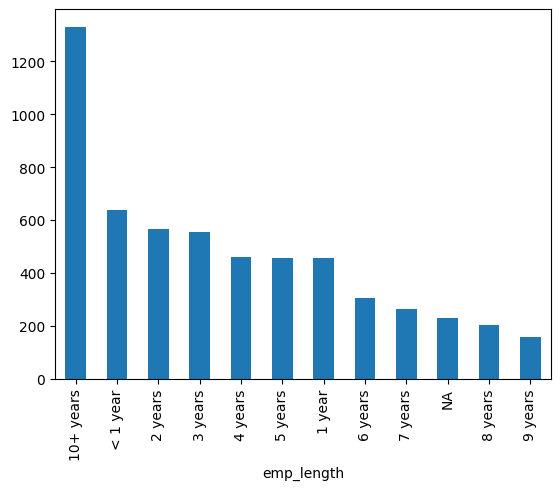

In [527]:
defaultedLoan_df.emp_length.value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '4 years'),
  Text(2, 0, '3 years'),
  Text(3, 0, '10+ years'),
  Text(4, 0, '1 year'),
  Text(5, 0, '9 years'),
  Text(6, 0, '2 years'),
  Text(7, 0, '8 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '5 years'),
  Text(10, 0, '6 years')])

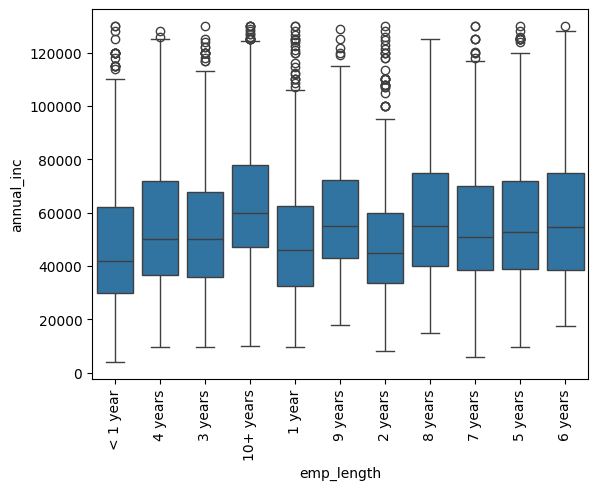

In [528]:
# def_below1_3Linc_df
sns.boxplot(x=def_below1_3Linc_df.emp_length, y=def_below1_3Linc_df.annual_inc)
plt.xticks(rotation=90)

**Observation**
- All the defaulters has mean annual income with in the range of 40000 to 60000

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '1 year'),
  Text(7, 0, '6 years'),
  Text(8, 0, '7 years'),
  Text(9, 0, '8 years'),
  Text(10, 0, '9 years'),
  Text(11, 0, 'NA')])

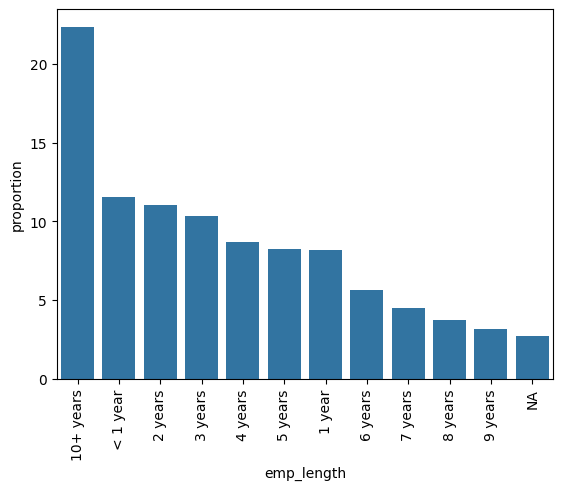

In [529]:
loan_df.emp_length = loan_df.emp_length.fillna('NA')
sns.barplot(data=loan_df.emp_length.value_counts(normalize=True).mul(100))
plt.xticks(rotation=90)

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\3757576567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_fullyPaid_df.emp_length = default_fullyPaid_df.emp_length.fillna('NA')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years'),
  Text(11, 0, 'NA')])

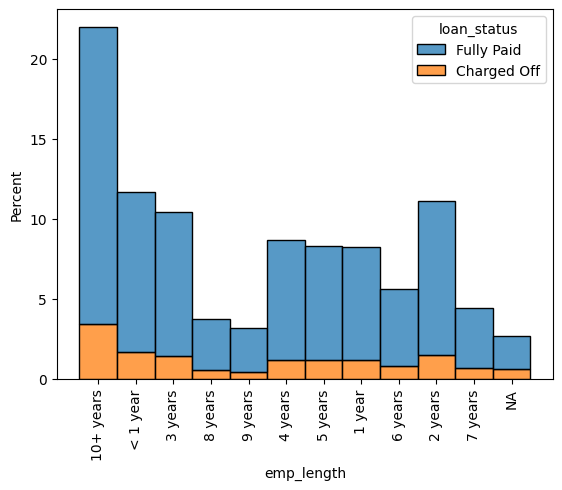

In [530]:
default_fullyPaid_df.emp_length = default_fullyPaid_df.emp_length.fillna('NA')
sns.histplot(data=default_fullyPaid_df, x='emp_length', hue='loan_status', multiple='stack', stat='percent')
plt.xticks(rotation=90)

In [531]:
loan_df.emp_length.value_counts(normalize=True).mul(100)

emp_length
10+ years    22.355666
< 1 year     11.539139
2 years      11.048166
3 years      10.310446
4 years       8.651207
5 years       8.263464
1 year        8.157716
6 years       5.612206
7 years       4.464083
8 years       3.723846
9 years       3.167409
NA            2.706650
Name: proportion, dtype: float64

In [532]:
defaultedLoan_df.emp_length.value_counts(normalize=True)*100

emp_length
10+ years    23.653812
< 1 year     11.355962
2 years      10.076417
3 years       9.863160
4 years       8.210414
5 years       8.139328
1 year        8.103785
6 years       5.455838
7 years       4.673894
NA            4.051893
8 years       3.607606
9 years       2.807891
Name: proportion, dtype: float64

**Observation**
- customers who have been employed for more than 10+ years of experience are more likely to be defaulters.

In [533]:
default_fullyPaid_df.emp_length = fullyPaidLoan_df.emp_length.fillna('NA')

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\2341808726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_fullyPaid_df.emp_length = fullyPaidLoan_df.emp_length.fillna('NA')


**home analysis**

In [534]:
print(loan_df.home_ownership.notnull().sum())
loan_df.home_ownership.value_counts()

39717


home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [535]:
defaultedLoan_df.home_ownership.value_counts()

home_ownership
RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: count, dtype: int64

#**checking out the percent of each category if any specific category is defaulting more**

In [536]:
print("rental_defaulters_percent: ", 100 * defaultedLoan_df[defaultedLoan_df.home_ownership == 'RENT'].shape[0]/defaultedLoan_df.shape[0])
print("mortgage_defaulters_percent: ", 100 * defaultedLoan_df[defaultedLoan_df.home_ownership == 'MORTGAGE'].shape[0]/defaultedLoan_df.shape[0])
print("other_defaulters_percent: ", 100 * defaultedLoan_df[defaultedLoan_df.home_ownership == 'OTHER'].shape[0]/defaultedLoan_df.shape[0])
print("ownHouse_defaulters_percent: ", 100 * defaultedLoan_df[defaultedLoan_df.home_ownership == 'OWN'].shape[0]/defaultedLoan_df.shape[0])
print("ownHouse_defaulters_percent: ", 100 * defaultedLoan_df[defaultedLoan_df.home_ownership != 'OWN'].shape[0]/defaultedLoan_df.shape[0])

rental_defaulters_percent:  50.453172205438065
mortgage_defaulters_percent:  41.35418517860316
other_defaulters_percent:  0.3198862626621646
ownHouse_defaulters_percent:  7.872756353296606
ownHouse_defaulters_percent:  92.12724364670339


C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\3065668869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedLoan_df['hasOwnHome'] = defaultedLoan_df.home_ownership.apply(lambda x: 'OWNED' if x=='OWN' else 'NOT OWNED')


<Axes: xlabel='hasOwnHome', ylabel='count'>

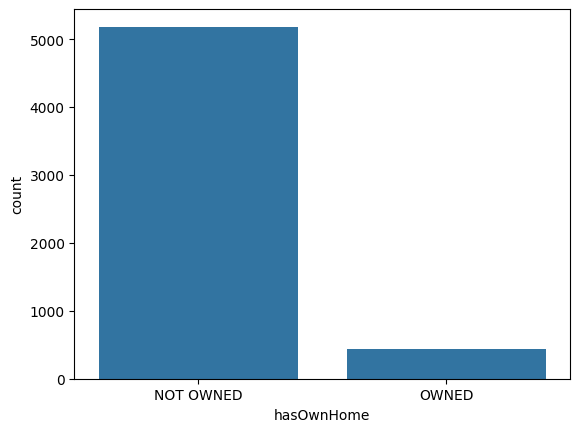

In [537]:
defaultedLoan_df['hasOwnHome'] = defaultedLoan_df.home_ownership.apply(lambda x: 'OWNED' if x=='OWN' else 'NOT OWNED')
sns.barplot(defaultedLoan_df.hasOwnHome.value_counts())

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\3316167852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullyPaidLoan_df['hasOwnHome'] = fullyPaidLoan_df.home_ownership.apply(lambda x: 'OWNED' if x=='OWN' else 'NOT OWNED')


<Axes: xlabel='hasOwnHome', ylabel='count'>

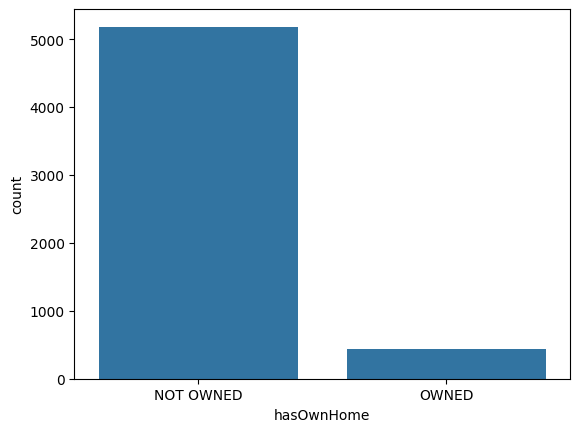

In [538]:
fullyPaidLoan_df.home_ownership.value_counts()
fullyPaidLoan_df['hasOwnHome'] = fullyPaidLoan_df.home_ownership.apply(lambda x: 'OWNED' if x=='OWN' else 'NOT OWNED')
sns.barplot(defaultedLoan_df.hasOwnHome.value_counts())

**Observation**
- only 7% of customers with own home have defaulted
- 92.1% of customer without own home have defaulted
- home_ownership could be a prime factor to consider 

**Purpose Analysis**

In [539]:
print(loan_df.purpose.notnull().sum())
loan_df.purpose.value_counts()

39717


purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

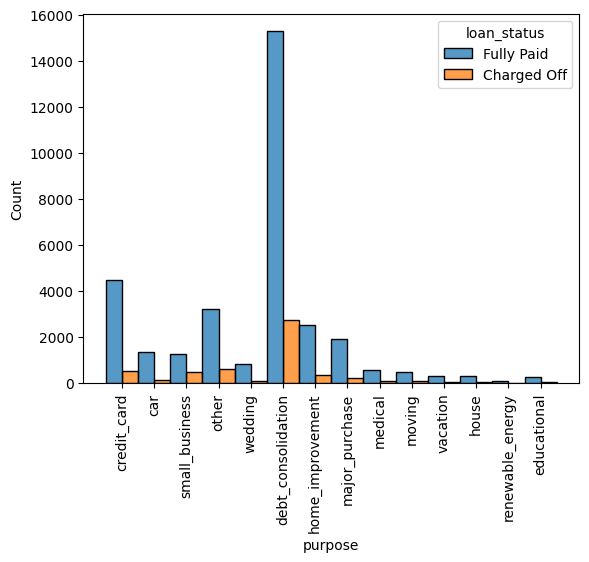

In [540]:
sns.histplot(data=default_fullyPaid_df, x='purpose', hue='loan_status', multiple='dodge')
plt.xticks(rotation=90)

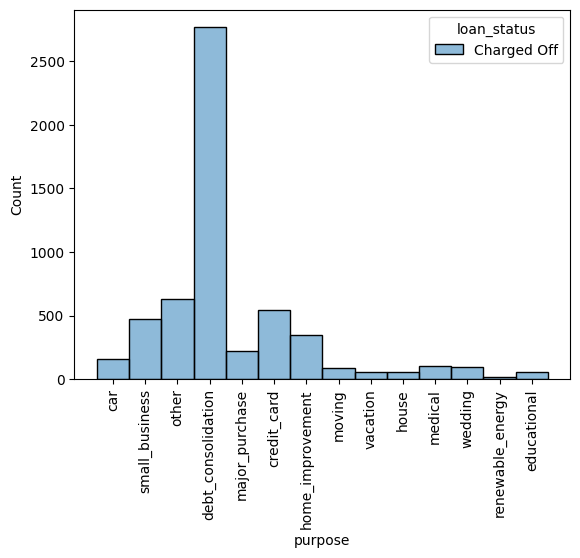

In [541]:
sns.histplot(data=defaultedLoan_df, x='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

**Observation**
- In defaulters list More defaulters have taken loan for 'debt_consolidation'
- But there are many who have full paid the loan. Need to confirm by checking through percent basis

In [542]:
default_fullyPaid_df.purpose.value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [543]:
cross_tab = pd.crosstab(index=default_fullyPaid_df['purpose'],
                        columns=default_fullyPaid_df['loan_status'], normalize='index')
cross_tab

loan_status,Charged Off,Fully Paid
purpose,,
car,0.106738,0.893262
credit_card,0.107818,0.892182
debt_consolidation,0.153254,0.846746
educational,0.172308,0.827692
home_improvement,0.120696,0.879304
house,0.160763,0.839237
major_purchase,0.103256,0.896744
medical,0.155653,0.844347
moving,0.159722,0.840278


<Axes: xlabel='purpose'>

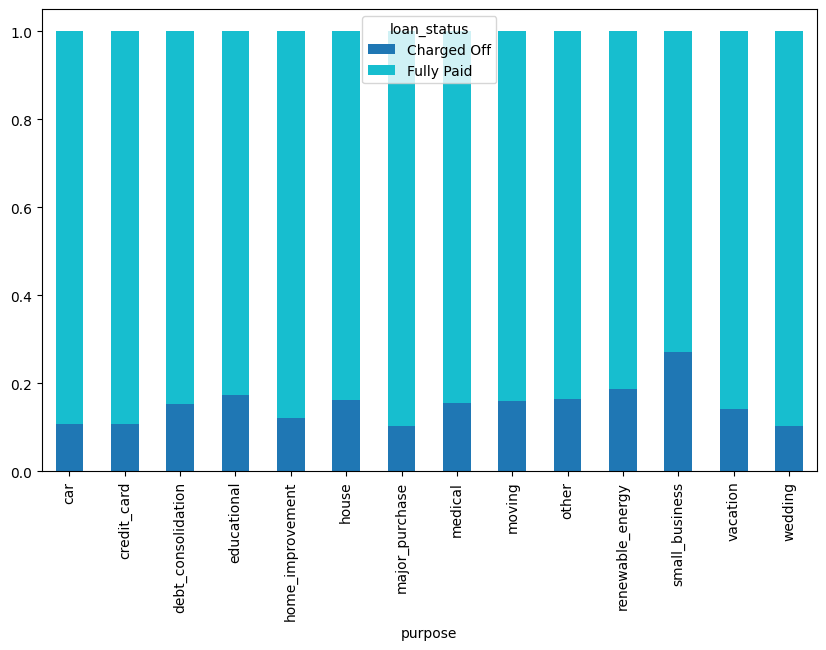

In [544]:
cross_tab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

**Observation**
- As previously mentioned 'debt-consolidation' has been less when compared via percent.
- purpose with 'small_business' have defaulted a lot. May be its because of the failure of the business.

**Address state analysis**

In [545]:
print(loan_df.addr_state.notnull().sum())
default_fullyPaid_df.addr_state.unique().shape

39717


(50,)

In [546]:
default_fullyPaid_df.addr_state.value_counts().describe()

count      50.00000
mean      771.54000
std      1182.86686
min         3.00000
25%       126.25000
50%       431.00000
75%       841.25000
max      6949.00000
Name: count, dtype: float64

<Axes: >

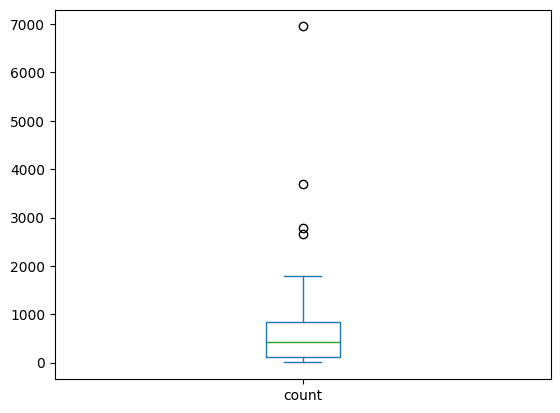

In [547]:
default_fullyPaid_df.addr_state.value_counts().plot.box()

In [548]:
default_fullyPaid_df.groupby(by='addr_state')['id'].count().tail(20)

addr_state
NJ    1790
NM     183
NV     479
NY    3698
OH    1178
OK     287
OR     435
PA    1468
RI     194
SC     459
SD      62
TN      17
TX    2659
UT     252
VA    1369
VT      53
WA     818
WI     440
WV     172
WY      80
Name: id, dtype: int64

<Axes: xlabel='addr_state'>

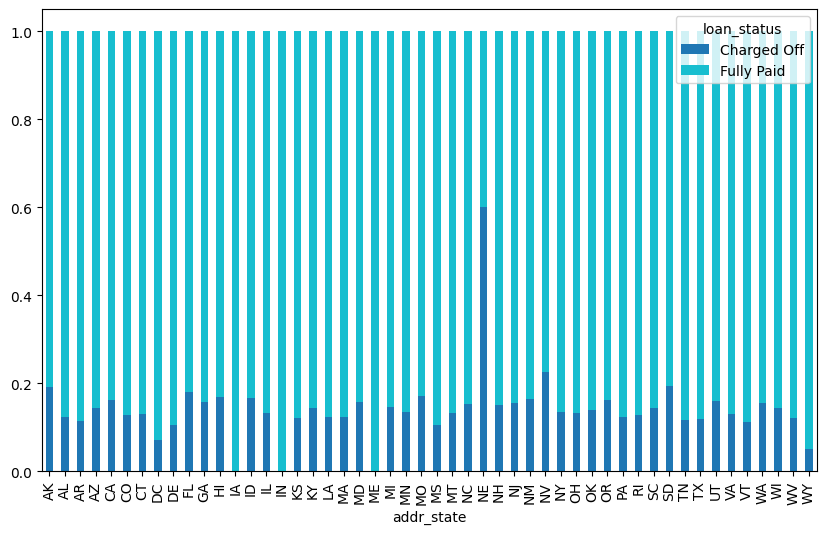

In [549]:
crosstabAddr_status = pd.crosstab(index=default_fullyPaid_df['addr_state'],
                        columns=default_fullyPaid_df['loan_status'], normalize='index')
crosstabAddr_status.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

**Observation**
- Here NE shows more percentage of defaulters but the total no accounts that we see in NE are only 5, which is not a quite good sample to rely on. So, lets try to have states having minimum of 50 samples and continue analysing 

In [550]:

addressCounter = default_fullyPaid_df.addr_state.value_counts()
statesGt50Accounts = addressCounter[(addressCounter>50)].index
print(statesGt50Accounts.shape)
statesGt50Accounts

(43,)


Index(['CA', 'NY', 'FL', 'TX', 'NJ', 'IL', 'PA', 'VA', 'GA', 'MA', 'OH', 'MD',
       'AZ', 'WA', 'CO', 'NC', 'CT', 'MI', 'MO', 'MN', 'NV', 'SC', 'WI', 'AL',
       'OR', 'LA', 'KY', 'OK', 'KS', 'UT', 'AR', 'DC', 'RI', 'NM', 'WV', 'NH',
       'HI', 'DE', 'MT', 'WY', 'AK', 'SD', 'VT'],
      dtype='object', name='addr_state')

<Axes: xlabel='addr_state'>

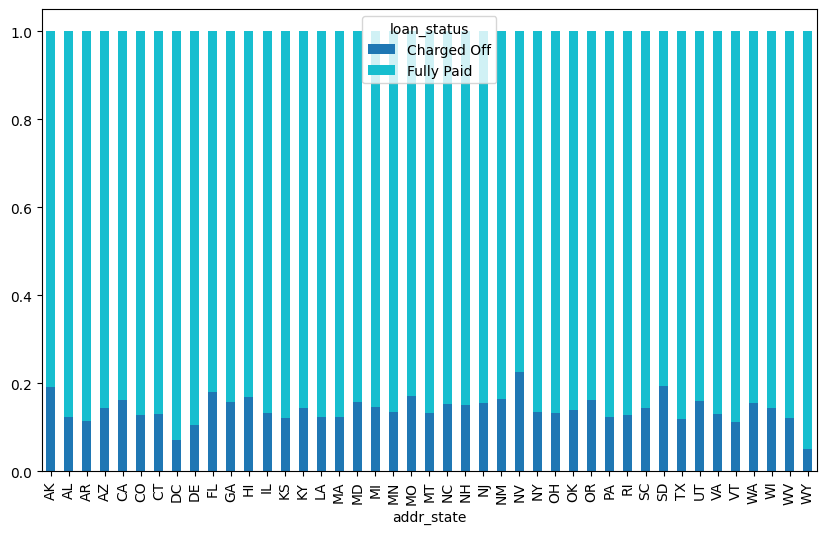

In [551]:
default_fullyPaid_addressCounterGT50_df = default_fullyPaid_df[default_fullyPaid_df.addr_state.isin(statesGt50Accounts)]
crosstabAddr_status1 = pd.crosstab(index=default_fullyPaid_addressCounterGT50_df['addr_state'],
                        columns=default_fullyPaid_addressCounterGT50_df['loan_status'], normalize='index')
crosstabAddr_status1.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

**Observation**
- Based on this Alaska(AK-79), Florida(FL-2781), Missouri(MO-479), Nevada(NV-670), South Dakota(SD) have more defaulters.
- NV has more percentage of defaulters
- FL has more percentage of defaulters with considerable sample size

**Interest rate Analysis**

In [552]:
# cleaning the data
default_fullyPaid_df.shape

(38577, 29)

In [553]:
default_fullyPaid_df.int_rate.notnull().sum()
# no null values

np.int64(38577)

In [554]:
#removing % from the int_rate column and converting it to float column
default_fullyPaid_df['int_rate']=default_fullyPaid_df.int_rate.apply(lambda x: float(x[0:-1]))

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\3699831044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_fullyPaid_df['int_rate']=default_fullyPaid_df.int_rate.apply(lambda x: float(x[0:-1]))


In [555]:
defaultedLoan_df['int_rate']=defaultedLoan_df.int_rate.apply(lambda x: float(x[0:-1]))

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\3736197295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedLoan_df['int_rate']=defaultedLoan_df.int_rate.apply(lambda x: float(x[0:-1]))


In [556]:
default_fullyPaid_df.int_rate.info()
default_fullyPaid_df.int_rate.head(5)

<class 'pandas.core.series.Series'>
Index: 38577 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
38577 non-null  float64
dtypes: float64(1)
memory usage: 602.8 KB


0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

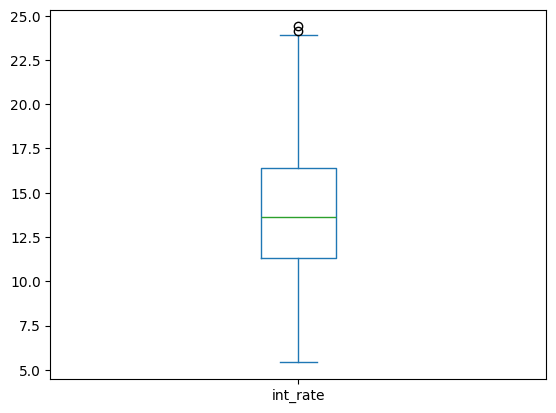

In [557]:
defaultedLoan_df.int_rate.plot.box()
defaultedLoan_df.int_rate.describe()

<Axes: xlabel='loan_status', ylabel='int_rate'>

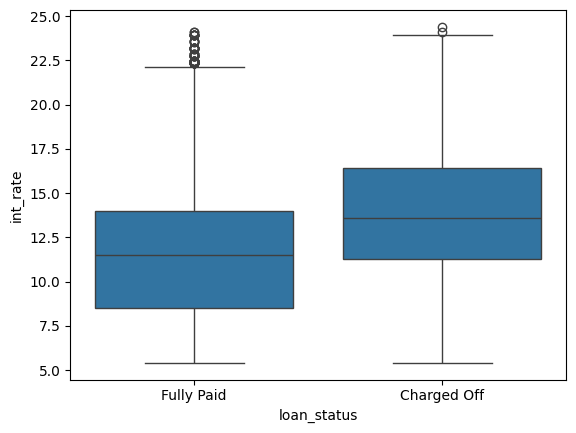

In [558]:
sns.boxplot(data=default_fullyPaid_df, x='loan_status', y='int_rate')

**Observation**
- we can see there is more spread of defaulters when interest rate is increased beyond ~12
- interest rate more than 12% seems to be a promissing factor to consider as the second quantile of defaulters has started at close to the mean of fully paid which clearly says that customers have been defaulting at the higher interest rates. Reason could be they might be failing to pay the installments with higher interest rate.

<Axes: xlabel='term', ylabel='int_rate'>

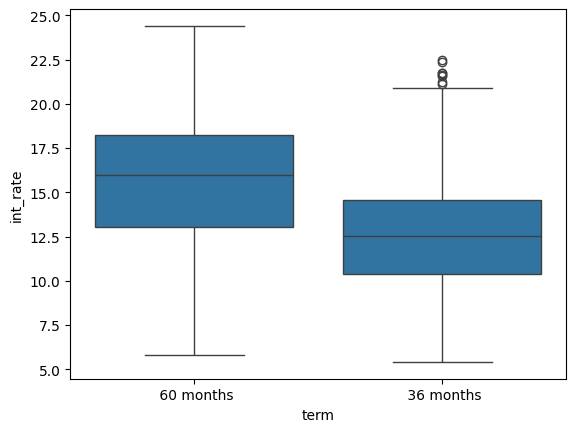

In [559]:
# checking the relation between term and int-rate
sns.boxplot(data=defaultedLoan_df, x='term', y='int_rate')

**Observation**
- higher interest rate for longest term is leading to the defaulters
- lowest interest rate for shortest term is also leading towards defaulters. 
- In both the cases, the installment value would be higher, which is the common point to look at where customers are being defaulters.

**Grade Analysis**

In [560]:
print("null count: ", default_fullyPaid_df.grade.isnull().sum())
default_fullyPaid_df.grade.value_counts()

null count:  0


grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

<Axes: xlabel='grade'>

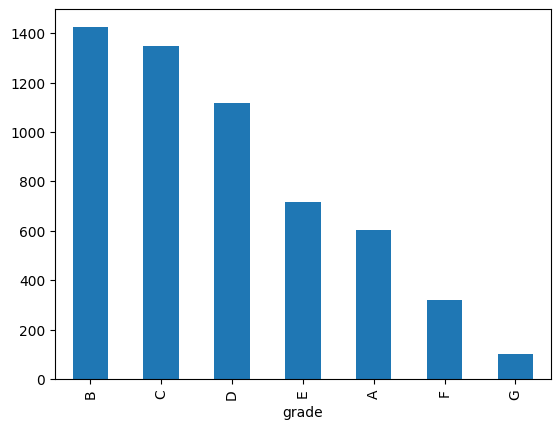

In [561]:
defaultedLoan_df.grade.value_counts().plot.bar()

**Observation**
- More number of defaulters are in grade B. Lets check this with percentage and come to a conclusion.

<Axes: xlabel='grade', ylabel='Count'>

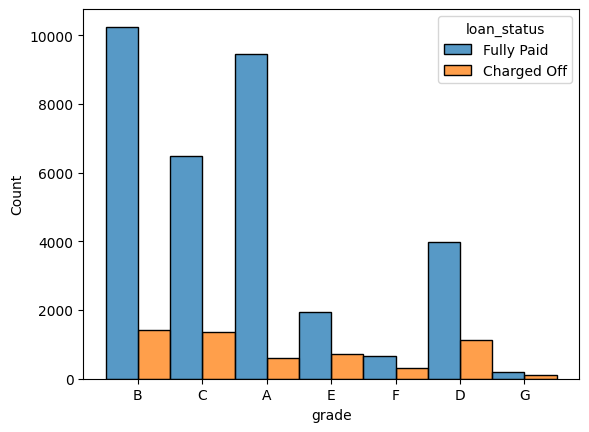

In [562]:
sns.histplot(data=default_fullyPaid_df, x='grade', hue='loan_status', multiple='dodge')

<Axes: xlabel='grade'>

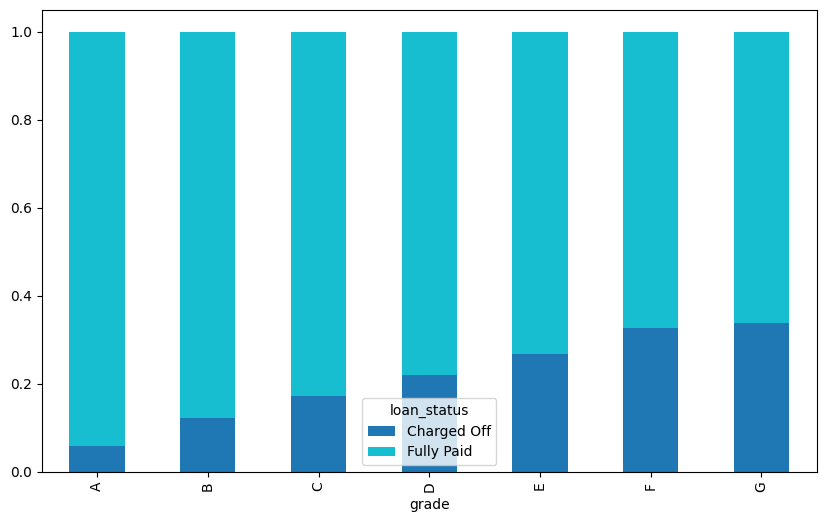

In [563]:
crosstabAddr_status2 = pd.crosstab(index=default_fullyPaid_df['grade'],
                        columns=default_fullyPaid_addressCounterGT50_df['loan_status'], normalize='index')
crosstabAddr_status2.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

**Observations**
- Grade G has the more percentage of defaulters for its sample size of 299

**SubGrade Analysis**

In [564]:
default_fullyPaid_df.sub_grade.isnull().sum()

np.int64(0)

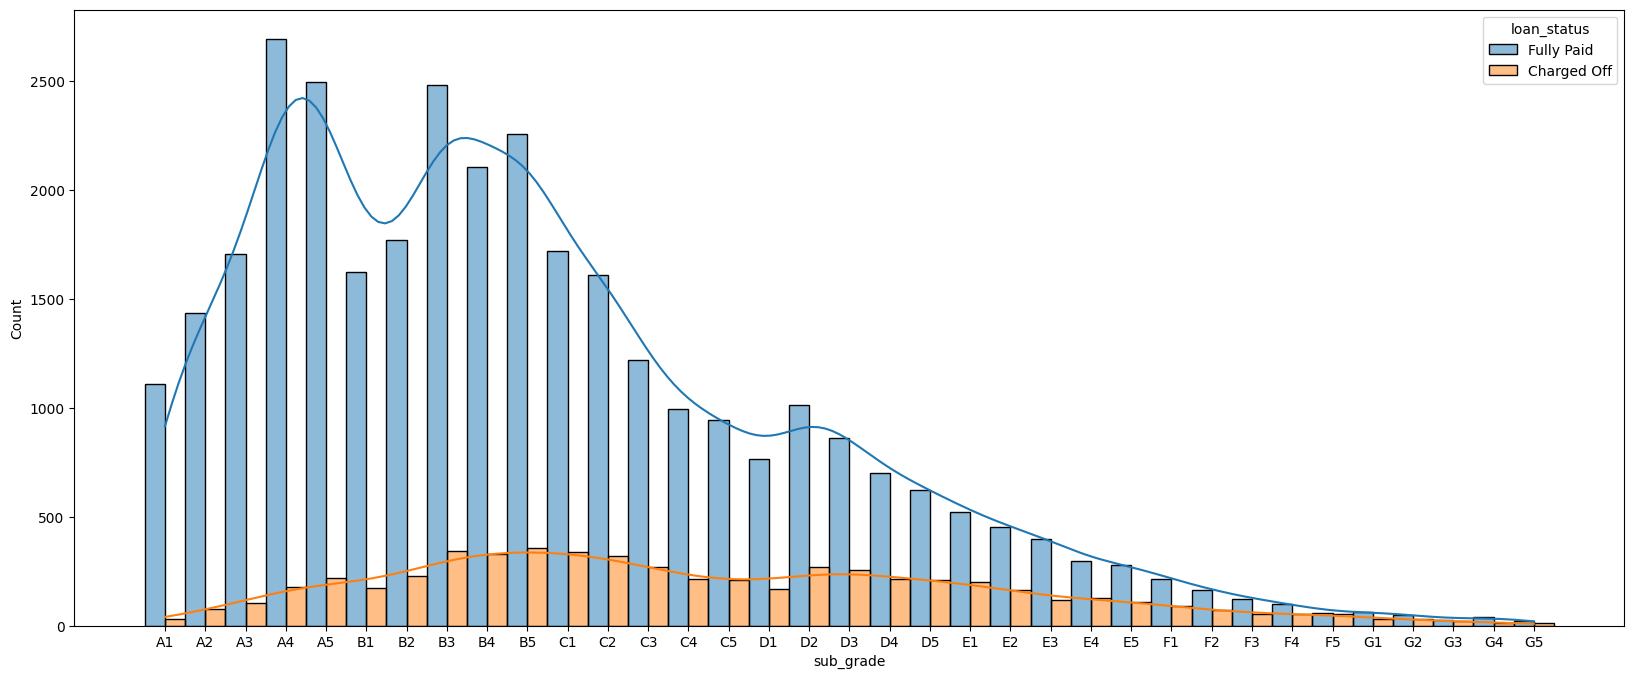

In [565]:
plt.figure(figsize=(20, 8))
sns.histplot(data=default_fullyPaid_df.sort_values(by='sub_grade'), x='sub_grade', hue='loan_status', multiple='dodge', kde=True)
plt.show()

**Observation**
-  when we check on counts, the defaulters and fully paid have been converged towards C TO G which says that the percentage of people defaulted has increased as sub-grade increased.

<Axes: xlabel='sub_grade'>

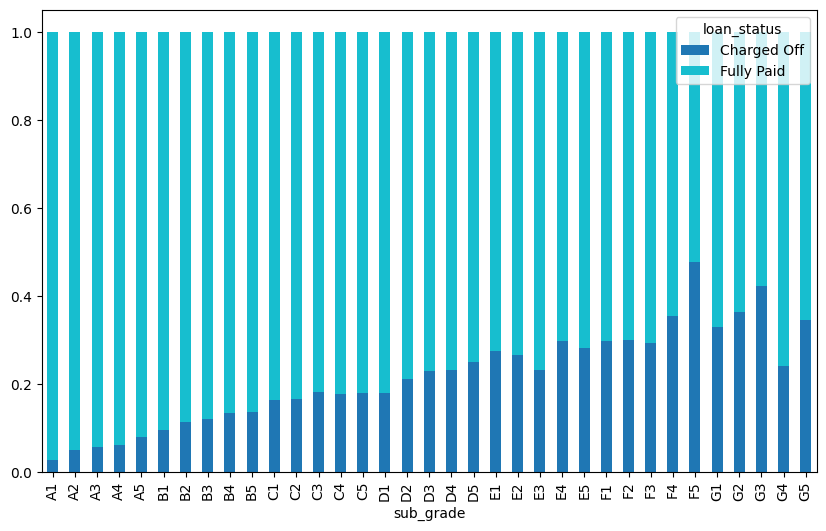

In [566]:
crosstabAddr_status3 = pd.crosstab(index=default_fullyPaid_df['sub_grade'],
                        columns=default_fullyPaid_addressCounterGT50_df['loan_status'], normalize='index')
crosstabAddr_status3.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

In [567]:
default_fullyPaid_df['sub_grade'].value_counts().tail(10)

sub_grade
F1    305
F2    233
F3    174
F4    151
F5    113
G1     94
G2     77
G4     54
G3     45
G5     29
Name: count, dtype: int64

**Observation**
- Seems like there are less accounts issued as the subgrade increased from A1 to G5
- Seems like company is already following a grade system to issue loans and the defaulters percentage have been increasing as the grade increased from A1 to G5

**Verification Analysis**

In [568]:
defaultedLoan_df.verification_status.isnull().sum()

np.int64(0)

In [569]:
pivot_table = pd.pivot_table(data=default_fullyPaid_df, index='verification_status', columns='loan_status', values='id', aggfunc='count')
pivot_table

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2142,14552
Source Verified,1434,8243
Verified,2051,10155


In [570]:
print("notVerfied Defaulted Percentage: ", 100 * 2142/16694)
print("Source Verified Defaulted Percentage: ", 100 * 1434/9677)
print("Verified Defaulted Percentage: ", 100 * 2051/12206)

notVerfied Defaulted Percentage:  12.830957230142566
Source Verified Defaulted Percentage:  14.81864214115945
Verified Defaulted Percentage:  16.803211535310503


**Observation**
- Verified defaulted percentage is higher when compared to not verified.
- Need to understand by the company why this happens?

**dti analysis**

In [571]:
# checking for nulls
default_fullyPaid_df.dti.isnull().sum()

np.int64(0)

<Axes: ylabel='dti'>

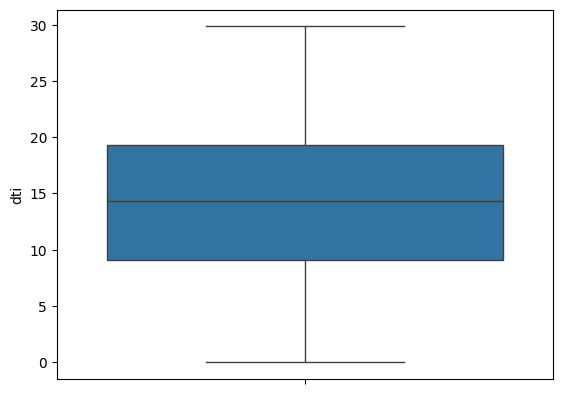

In [572]:
sns.boxplot(data=defaultedLoan_df.dti)

<Axes: xlabel='loan_status', ylabel='dti'>

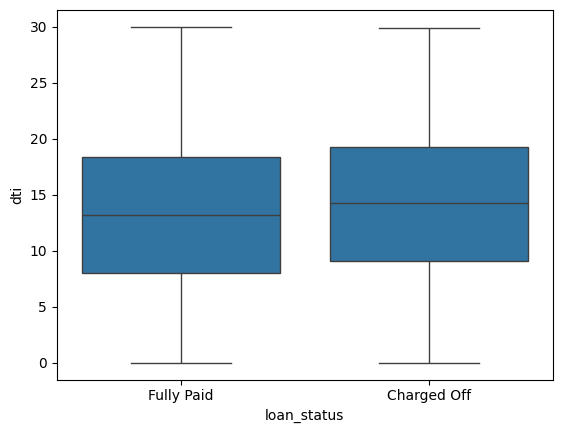

In [573]:
sns.boxplot(data=default_fullyPaid_df, x='loan_status', y='dti')

In [574]:
defaultedLoan_df.dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

**Observation**
- Nothing has been learned through dti field, lets compare it with some other fields later and lets see what comes out?

**delinq_2yrs Analysis**

defaulters with delinq_2yrs > 0 :  691 of 5627


<Axes: xlabel='loan_status', ylabel='delinq_2yrs'>

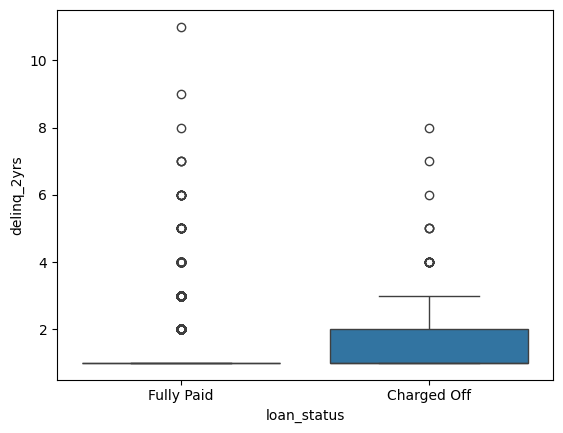

In [575]:
defaultedLoan_df.delinq_2yrs.isnull().sum()
print("defaulters with delinq_2yrs > 0 : ", defaultedLoan_df[defaultedLoan_df.delinq_2yrs > 0].shape[0], 'of', defaultedLoan_df.shape[0])
sns.boxplot(data=default_fullyPaid_df[default_fullyPaid_df.delinq_2yrs > 0], x='loan_status', y='delinq_2yrs')

**Observation**
- out of 5627 defaulters, 691 have delinq_2yrs value more than 0

**Open Accounts Analysis**

In [576]:
default_fullyPaid_df.open_acc.isnull().sum()

np.int64(0)

In [577]:
default_fullyPaid_df.open_acc.describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

<Axes: xlabel='loan_status', ylabel='open_acc'>

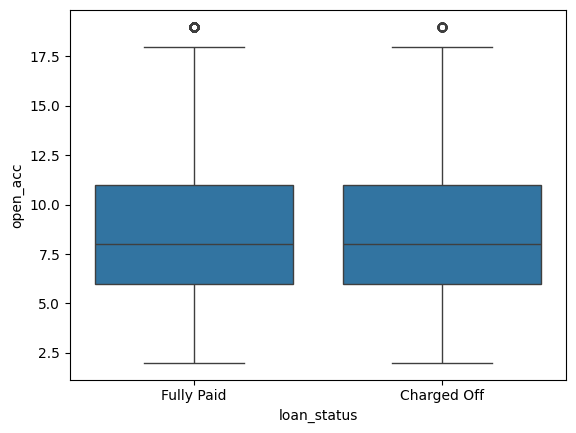

In [578]:
sns.boxplot(data=default_fullyPaid_df[default_fullyPaid_df.open_acc < 20], x='loan_status', y='open_acc')

**Observation**
- The spread was similar to both fully paid and charged off

In [579]:
defaultedLoan_df.pub_rec.value_counts()

pub_rec
0    5160
1     457
2      10
Name: count, dtype: int64

**Observation**
- Most of pub_rec values are 0's. It doesn't have much significance in determining the defaulters

**revolving balance analysis**

In [580]:
default_fullyPaid_df.revol_bal.isnull().sum()

np.int64(0)

<Axes: xlabel='loan_status', ylabel='revol_bal'>

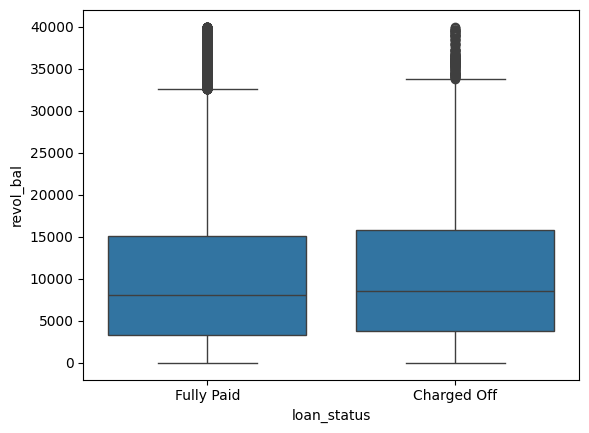

In [581]:
sns.boxplot(data=default_fullyPaid_df[default_fullyPaid_df.revol_bal < 40000], x='loan_status', y='revol_bal')

In [582]:
defaultedLoan_df['revol_util'] = defaultedLoan_df.revol_util.apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\1487015227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedLoan_df['revol_util'] = defaultedLoan_df.revol_util.apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)


In [583]:
defaultedLoan_df.revol_util.isnull().sum()

np.int64(16)

<Axes: >

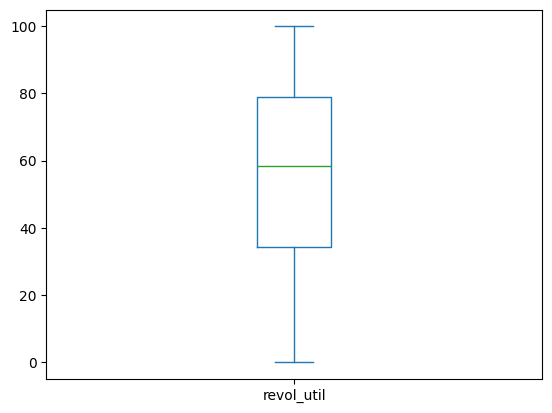

In [584]:
defaultedLoan_df.revol_util.plot.box()

In [585]:
defaultedLoan_df['revol_util'] = defaultedLoan_df.revol_util.fillna(defaultedLoan_df.revol_util.mean())

C:\Users\lpotluri\AppData\Local\Temp\ipykernel_7564\4021554003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedLoan_df['revol_util'] = defaultedLoan_df.revol_util.fillna(defaultedLoan_df.revol_util.mean())


In [586]:
defaultedLoan_df.revol_util.isnull().sum()

np.int64(0)

<Axes: ylabel='revol_util'>

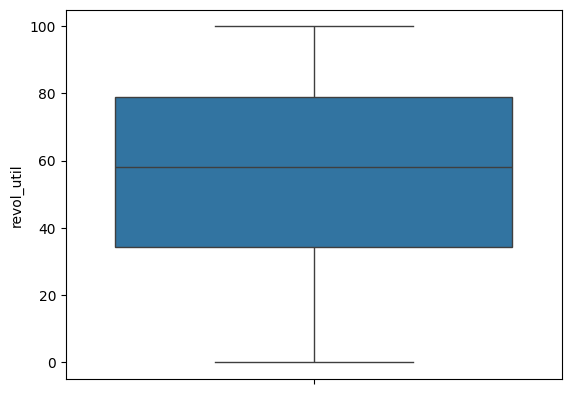

In [587]:
sns.boxplot(defaultedLoan_df.revol_util)

<Axes: xlabel='revol_bal', ylabel='revol_util'>

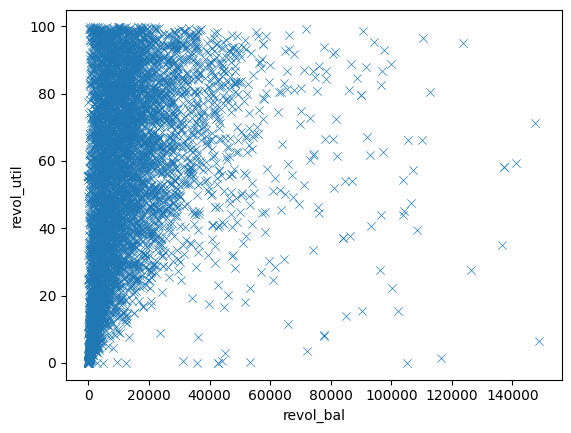

In [588]:
sns.scatterplot(data=defaultedLoan_df, x='revol_bal', y='revol_util', marker='x')

<Axes: xlabel='revol_bal', ylabel='revol_util'>

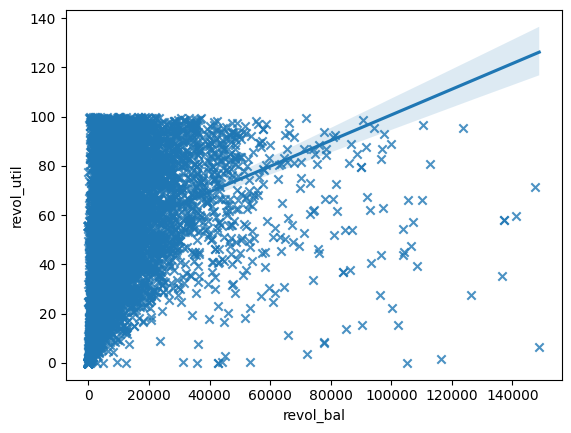

In [589]:
sns.regplot(data=defaultedLoan_df, x='revol_bal', y='revol_util', marker='x')

**Observation**
- when we compare revol_util with revol_bal, more defaulters are accumulated where the revol_util is higher.

**total_acc Analysis**

In [590]:
default_fullyPaid_df.total_acc.isnull().sum()

np.int64(0)

<Axes: xlabel='loan_status', ylabel='total_acc'>

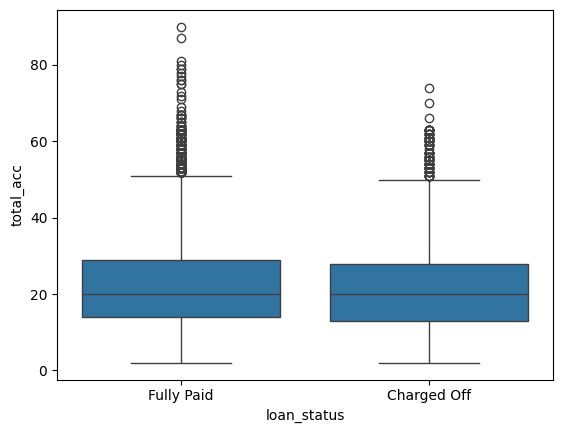

In [591]:
sns.boxplot(data=default_fullyPaid_df, x='loan_status', y='total_acc')

<Axes: xlabel='annual_inc', ylabel='total_acc'>

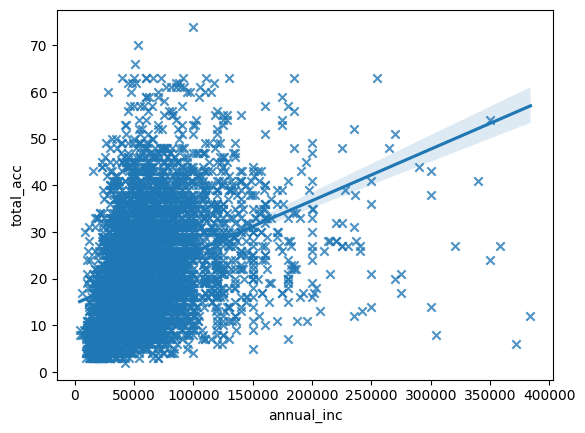

In [592]:
sns.regplot(data=defaultedLoan_df[defaultedLoan_df.annual_inc < 400000], x='annual_inc', y='total_acc', marker='x')

In [593]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'installmentPercent'],
      dtype='object')

**application_type**

In [594]:
default_fullyPaid_df.application_type.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'application_type'

In [481]:
default_fullyPaid_df.application_type.value_counts()

application_type
INDIVIDUAL    38577
Name: count, dtype: int64

In [483]:
defaultedLoan_df.acc_now_delinq.isnull().sum()
defaultedLoan_df.acc_now_delinq.value_counts()

acc_now_delinq
0    5627
Name: count, dtype: int64

In [485]:
defaultedLoan_df.delinq_amnt.isnull().sum()

np.int64(0)

In [487]:
defaultedLoan_df.delinq_amnt.value_counts()

delinq_amnt
0    5627
Name: count, dtype: int64

In [498]:
defaultedLoan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    5141
1.0     366
2.0       2
Name: count, dtype: int64